In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

In [2]:
DEVICE = 'cuda'

## Torus model

In [3]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

In [4]:
par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

In [6]:
s = swyft.NestedRatios(model, prior, noise = noise, obs = obs0, device = DEVICE)
s.run(Ninit = 3000, train_args = dict(lr_schedule = [1e-3, 1e-4]), max_rounds = 10, density_factor = 2, Nmax = 15000)

Simulate:   2%|▏         | 63/3010 [00:00<00:04, 625.81it/s]

Creating new cache.
N = 3000
Adding 3010 new samples.


Simulate: 100%|██████████| 3010/3010 [00:04<00:00, 614.89it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 2.476
Validation loss: 2.275
Validation loss: 2.149
Validation loss: 2.224
Total epochs: 4
LR iteration 1
Validation loss: 2.234
Validation loss: 2.133
Validation loss: 2.174
Total epochs: 3


Simulate:   2%|▏         | 65/2719 [00:00<00:04, 648.83it/s]

New prior volume: 0.09812766774804099
Constrained prior volume decreased by factor 0.09812766774804099
N = 3000
Adding 2719 new samples.


Simulate: 100%|██████████| 2719/2719 [00:04<00:00, 646.54it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.004
Validation loss: 2.797
Validation loss: 2.791
Validation loss: 2.931
Total epochs: 4
LR iteration 1
Validation loss: 2.751
Validation loss: 2.826
Total epochs: 2


Simulate:   0%|          | 0/3216 [00:00<?, ?it/s]

New prior volume: 0.05441929400094381
Constrained prior volume decreased by factor 0.5545764538160057
N = 4929.524837722575
Adding 3216 new samples.


Simulate: 100%|██████████| 3216/3216 [00:04<00:00, 718.06it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.198
Validation loss: 3.131
Validation loss: 3.061
Validation loss: 2.973
Validation loss: 2.990
Total epochs: 5
LR iteration 1
Validation loss: 2.975
Validation loss: 2.950
Validation loss: 2.945
Validation loss: 2.966
Total epochs: 4
New prior volume: 0.024111097966847916
Constrained prior volume decreased by factor 0.44306157236126126
N = 7516.051541864441


Simulate:   1%|▏         | 75/5401 [00:00<00:07, 749.76it/s]

Adding 5401 new samples.


Simulate: 100%|██████████| 5401/5401 [00:07<00:00, 748.60it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.371
Validation loss: 3.318
Validation loss: 3.321
Total epochs: 3
LR iteration 1
Validation loss: 3.246
Validation loss: 3.198
Validation loss: 3.245
Total epochs: 3
New prior volume: 0.019467440650429834
Constrained prior volume decreased by factor 0.8074058127587976
N = 13997.496552707742


Simulate:   0%|          | 0/8030 [00:00<?, ?it/s]

Adding 8030 new samples.


Simulate: 100%|██████████| 8030/8030 [00:10<00:00, 747.22it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.318
Validation loss: 3.258
Validation loss: 3.188
Validation loss: 3.201
Total epochs: 4
LR iteration 1
Validation loss: 3.174
Validation loss: 3.202
Total epochs: 2
New prior volume: 0.013085923288617289
Constrained prior volume decreased by factor 0.6721953606330042
N = 15000


Simulate:   0%|          | 0/5847 [00:00<?, ?it/s]

Adding 5847 new samples.


Simulate: 100%|██████████| 5847/5847 [00:07<00:00, 772.60it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.336
Validation loss: 3.253
Validation loss: 3.270
Total epochs: 3
LR iteration 1
Validation loss: 3.262
Validation loss: 3.241
Validation loss: 3.259
Total epochs: 3
New prior volume: 0.013084721237201233
Constrained prior volume decreased by factor 0.9999081416427756


In [7]:
post = s.gen_2d_marginals(N = 15000)

Generating marginals for: [('a',), ('a', 'b'), ('a', 'c'), ('b',), ('b', 'c'), ('c',)]
Using volume: 0.013085923288617289
No new simulator runs required.
No simulations required.
n_features = 3
Start training
LR iteration 0
Validation loss: 5.990
Validation loss: 5.803
Validation loss: 5.672
Validation loss: 5.648
Validation loss: 5.731
Total epochs: 5
LR iteration 1
Validation loss: 5.564
Validation loss: 5.685
Total epochs: 2
LR iteration 2
Validation loss: 5.500
Validation loss: 5.594
Total epochs: 2


In [10]:
post_samples = post(obs0, n_samples = 10000000)

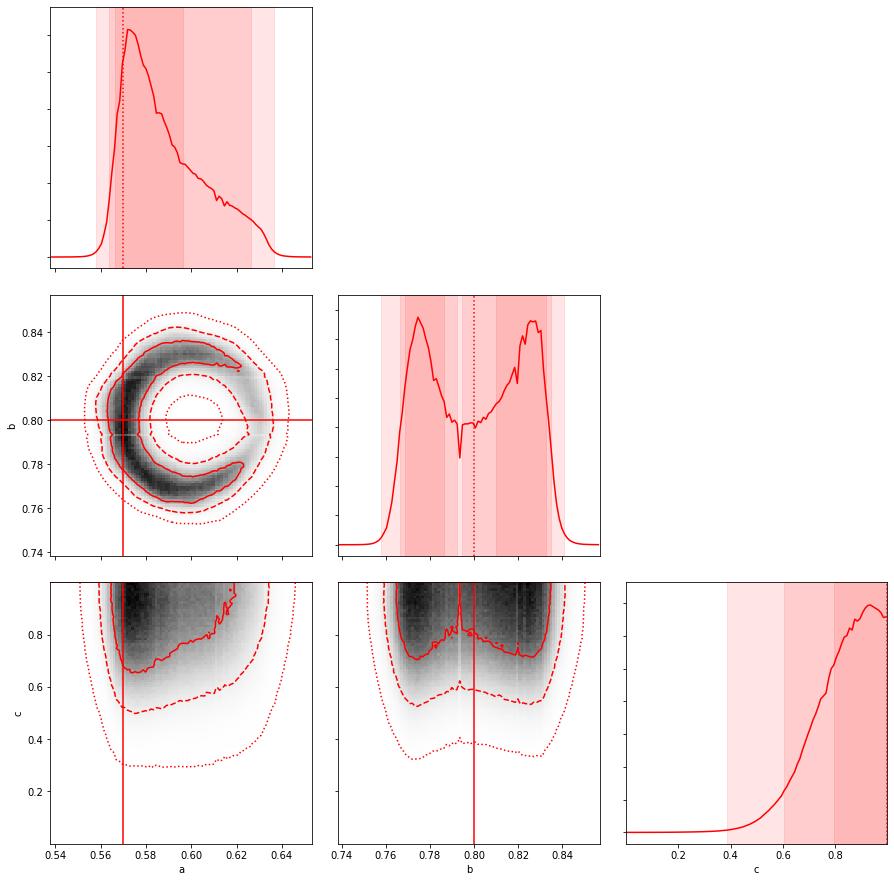

In [11]:
swyft.corner(post_samples, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)